In [1]:
#Initializing libraries
import random, copy
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from pyswarm import pso

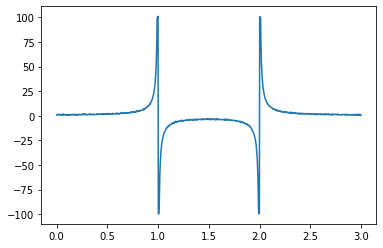

In [2]:
# TASK 1
#Generating base data (x,y)
k = np.array([i for i in range(0, 1001)])
x = 3 * k / 1000
func = lambda x: 1 / (x ** 2 - 3 * x + 2)
y = func(x)

np.random.seed(12345)
for i in range(len(y)):
    if y[i] < -100:
        y[i] = -100 + np.random.normal(loc = 0.5, scale = 0.25)
    else:
        if y[i] > 100:
            y[i] = 100 + np.random.normal(loc = 0.5, scale = 0.25)
        else:
            y[i] += np.random.normal(loc = 0.5, scale = 0.25)

plt.plot(x,y)

In [3]:
#Initializating functions
def rational_function(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

def least_squares(vector, func, x, y):
    a, b, c, d = vector
    return np.sum((func(x, a, b, c, d) - y) ** 2)

def least_squares_lm(vector, func, x, y):
    a, b, c, d = vector
    return func(x, a, b, c, d) - y

In [4]:
#Computation of methods
eps = 0.001
x0 = np.ones(4)

#Nelder-Mead method
result_nm = optimize.minimize(least_squares, x0, method='nelder-mead', args=(rational_function, x, y), options={'disp': True, 'maxiter': 1000, 'fatol': eps})

#Levenberg-Marquardt method
x0 = np.ones(4)
result_lm = optimize.least_squares(least_squares_lm, x0, method='lm', args=(rational_function, x, y), ftol=eps)

#Particle swarm method
lb = np.ones(4) * -1 #lower bound
ub = np.ones(4) #upper bound
xopt, fopt = pso(least_squares, lb, ub, maxiter=1000, args=(rational_function, x, y), swarmsize=1000, minfunc=eps)
result_pso = xopt

#Differential Evolution method
bounds = np.array([[-10, 10], [-10, 10], [-10, 10], [-10, 10]])
result_de = optimize.differential_evolution(least_squares, bounds, args=(rational_function, x, y), tol=eps)

Optimization terminated successfully.
         Current function value: 135633.169192
         Iterations: 341
         Function evaluations: 576
Stopping search: Swarm best objective change less than 0.001


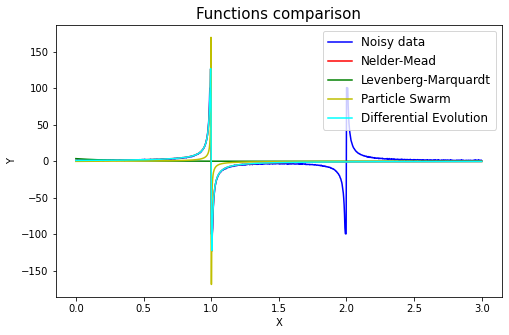

In [5]:
plt.figure(figsize=(8,5))
plt.title("Functions comparison", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, 'b', label="Noisy data")
plt.plot(x, rational_function(x, *result_nm.x), 'r', label="Nelder-Mead")
plt.plot(x, rational_function(x, *result_lm.x), 'g', label="Levenberg-Marquardt")
plt.plot(x, rational_function(x, *result_pso), color='y', label="Particle Swarm")
plt.plot(x, rational_function(x, *result_de.x), color='aqua', label="Differential Evolution")
plt.legend(fontsize=12)

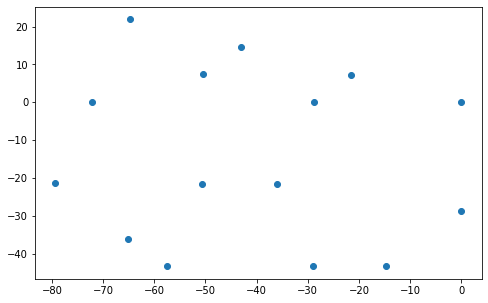

In [159]:
# TASK 2
#Data imported from: https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html 
#Dataset used for this task: lau15_xy.txt
xy = np.array([
[0.549963E-07, 0.985808E-08],
[-28.8733, -0.797739E-07],
[-79.2916, -21.4033],
[-14.6577, -43.3896],
[-64.7473, 21.8982],
[-29.0585, -43.2167],
[-72.0785, 0.181581],
[-36.0366, -21.6135],
[-50.4808, 7.37447],
[-50.5859, -21.5882],
[-0.135819, -28.7293],
[-65.0866, -36.0625],
[-21.4983, 7.31942],
[-57.5687, -43.2506],
[-43.0700, 14.5548]])

x = [item[0] for item in xy]
y = [item[1] for item in xy]
plt.figure(figsize=(8,5))
plt.scatter(x,y)

Total distance:  818.0261064149839


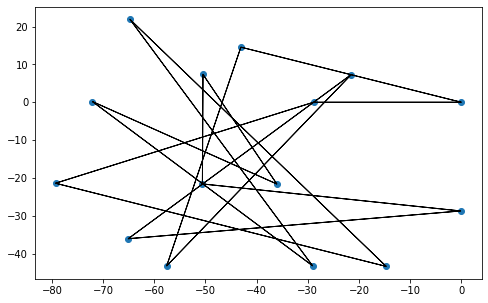

In [160]:
#Initializating functions
def distance(xy1, xy2):
    return np.sqrt(np.sum((xy2 - xy1) ** 2))

def distance_matrix_func(xy):
    distance_matrix = np.ones((xy.shape[0], xy.shape[0]))
    for i, xy1 in enumerate(xy):
        for j, xy2 in enumerate(xy):
            distance_matrix[i, j] = distance(xy1, xy2)
    return distance_matrix

def total_distance(distance_matrix):
    S = 0
    for i in range(14):
        S += distance_matrix[i + 1, i]
    S += distance_matrix[0,14]
    return S

#1st iteration visualization
print('Total distance: ', total_distance(distance_matrix_func(xy)))
plt.figure(figsize=(8,5))
plt.scatter(x,y)
for i in range(14):
    plt.arrow(xy[i][0],xy[i][1],xy[i+1][0]-xy[i][0],xy[i+1][1]-xy[i][1])
plt.arrow(xy[14][0],xy[14][1],xy[0][0]-xy[14][0],xy[0][1]-xy[14][1])

In [161]:
random.seed(123456)
T = 100000
S_list = []
S = total_distance(distance_matrix_func(xy))
S_list.append(S)
i = 0
while S > 350:
    i += 1
    i_swap = random.sample(range(15), 2)
    xy_copy = copy.copy(xy)
    xy_temp = copy.copy(xy_copy[i_swap[0]])
    xy_copy[i_swap[0]] = xy_copy[i_swap[1]]
    xy_copy[i_swap[1]] = xy_temp
    S = total_distance(distance_matrix_func(xy_copy))
    S_list.append(S)
    if S_list[i] < S_list[i - 1]:
        xy = xy_copy
        T = T * 0.999
    else:
        delta = S_list[i] - S_list[i - 1]
        probability = np.exp(-delta / T)
        random_roll = random.uniform(0, 1)
        if random_roll < probability:
            xy = xy_copy
            T = T * 0.999

Total distance:  340.262140904361


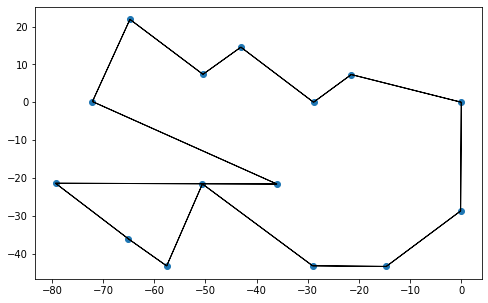

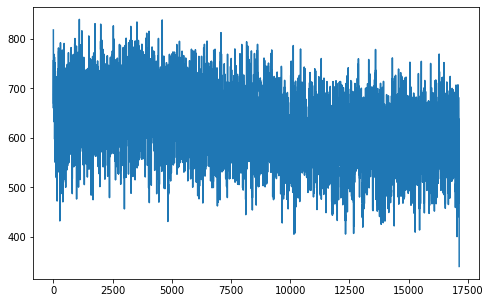

In [162]:
plt.figure(figsize=(8,5))
plt.scatter(x,y)
for i in range(14):
    plt.arrow(xy[i][0],xy[i][1],xy[i+1][0]-xy[i][0],xy[i+1][1]-xy[i][1])
plt.arrow(xy[14][0],xy[14][1],xy[0][0]-xy[14][0],xy[0][1]-xy[14][1])

print('Total distance: ', total_distance(distance_matrix_func(xy)))

plt.figure(figsize=(8,5))
plt.plot(S_list)